## Muhammad Abdullah Shafiq

# Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv('iris.csv', index_col=0)

In [29]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

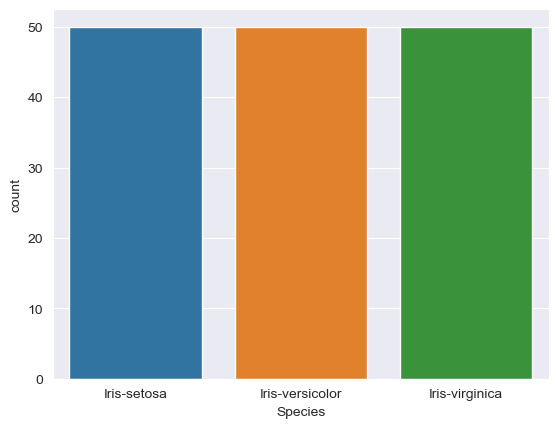

In [38]:
sns.countplot(data=data, x='Species')
plt.show()

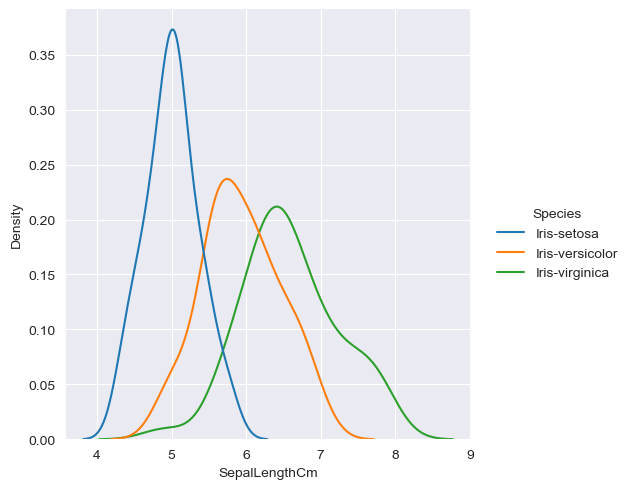

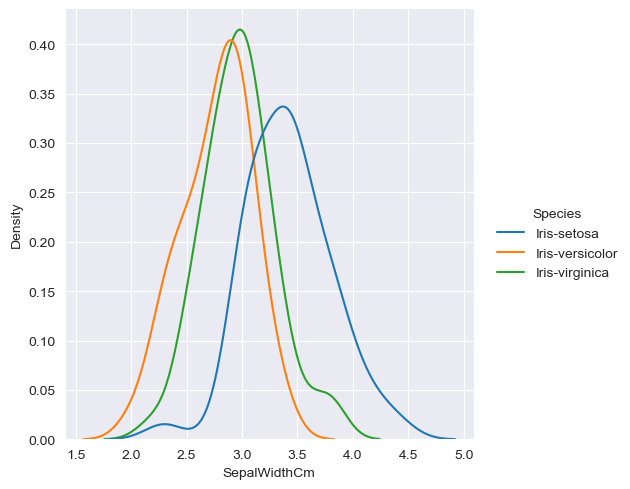

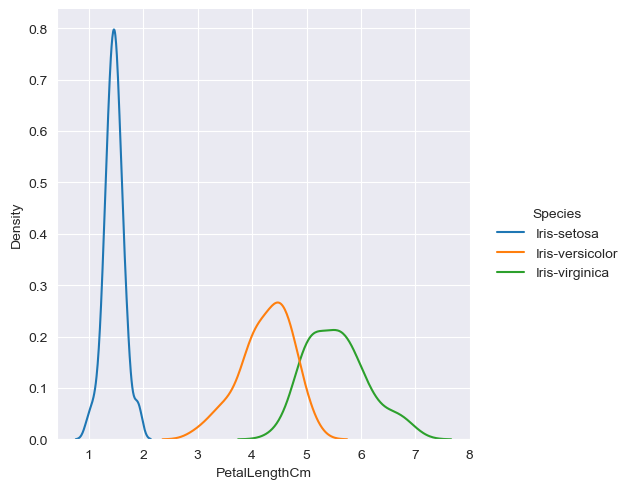

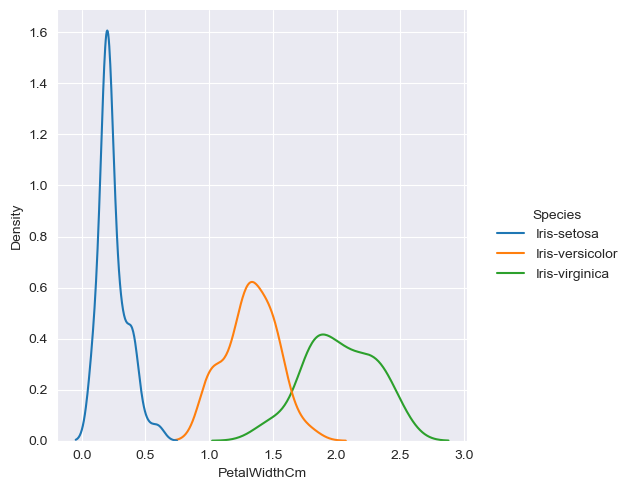

In [60]:
for i in data.iloc[:,:-1:].columns:
    sns.displot(data=data,x=i,hue='Species', kind='kde') 
    plt.show()

# Distributions seems normal

# Data preparation

In [64]:
x=data.iloc[:,:-1]

In [65]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


# Clustering

## using elbow method to determine best number of clusters

In [109]:
from sklearn.cluster import KMeans

In [110]:
wcss=[]

In [112]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=10,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

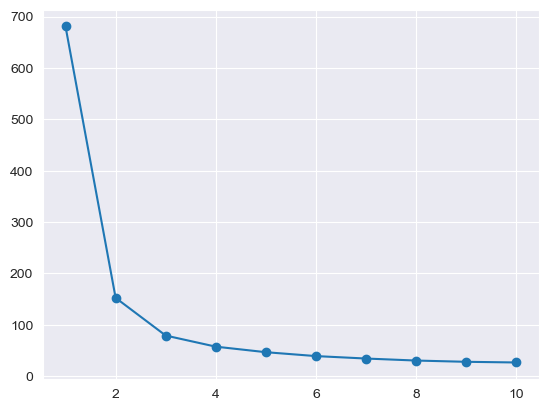

In [113]:
plt.plot(range(1,11), wcss, marker='o')
plt.show()

In [114]:
km=KMeans(n_clusters=3,random_state=101,init='k-means++')
pred=km.fit_predict(x)

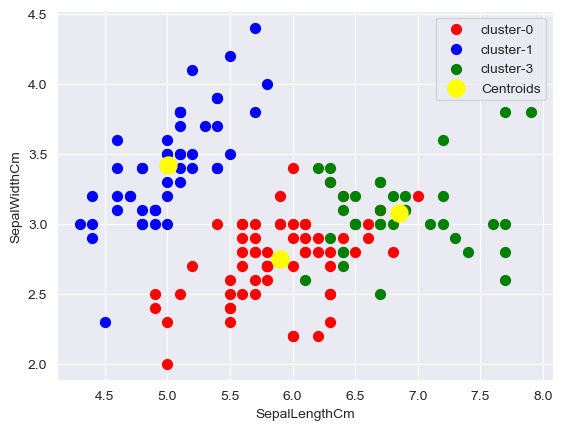

In [153]:
plt.scatter(x[pred==0].iloc[:,:1],x[pred==0].iloc[:,1:2],s = 50, c = 'red', label = 'cluster-0')
plt.scatter(x[pred == 1].iloc[:,:1], x[pred == 1].iloc[:,1:2],s = 50, c = 'blue', label = 'cluster-1')
plt.scatter(x[pred == 2].iloc[:,:1], x[pred == 2].iloc[:,1:2],s = 50, c = 'green', label = 'cluster-3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [143]:
data['clusters']=pred

In [152]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
